#Задание повышеной сложности
Попробуйте реализовать процесс обучения градиентного спуска на языке Python для линейной регрессии

In [92]:
# Зададим некое множество точек
import pandas as pd
x = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
y = pd.Series([2, 5, 4, 3, 6, 5, 8, 3, 5, 15, 13, 15, 7, 5, 19])

In [93]:
# Начальные значения k и b возьмем "с потолка"
import random
b = random.randint(min(x), max(x))
k = random.randint(min(x), max(x))
# Зададим количество шагов и размер шага
NUM_OF_STEPS = 100000
L = 0.001 #random.random() # тоже берем с потолка
print(b, k, L)

1 6 0.001


In [94]:
# Формула линейной регрессии. В нашем случае это y^ из лекции
def lr(x, k, b):
    '''
    Returns pd.Series for LinearRegression
    b:float + k:float * x:pd.Series
    '''
    return b + k * x

In [95]:
# Функция квадратичных потерь линейной регрессии для оценки правильности подбора коэффициентов
def MSE(x, y, k, b):
    '''
    Returns MSE for LinearRegression, type:float
    Needed x:pd.Series, y:pd.Series, k:float, b:float
    '''
    y_temp = y - lr(x, k, b)
    return ((1 / len(x)) * sum(y_temp)) ** 2

In [96]:
# Функция поиска dx qx
def dxi_qxi(x, y, k, b):
    '''
    Returns dx:float and qx:float
    Needed x:pd.Series, y:pd.Series, k:float, b:float
    '''
    n = len(x)
    x_temp = x * (y - lr(x, k, b))
    y_temp = y - lr(x, k, b)
    dx = (-2 / n) * sum(x_temp)
    qx = (-2 / n) * sum(y_temp)

    return dx, qx

In [97]:
# Эта ячейка просто для отладки, интересно было посмотреть некоторые стартовые значения
# dx, qx = dxi_qxi(x, y, k, b)
# print(dx, qx)
print(k, b, MSE(x, y, k, b))

6 1 1708.4444444444446


In [98]:
# Сама функция градиентного спуска, выполненная по условию задания
def graddes(x, y, k, b, L, NUM_OF_STEPS):
    '''
    Returns k:float, b:float
    Needed x:pd.Series, y::pd.Series, k:float, b:float, L:float, NUM_OF_STEPS:int
    '''
    for i in range(NUM_OF_STEPS):
        dx, qx = dxi_qxi(x, y, k, b)   # находим производные
        k = k - L * dx                 # изменяем коэффициенты
        b = b - L * qx                 # по требованию условия задачи
        L = L #/ 1.618                  # уменьшаем шаг градиентного спуска в "золотое сечение" раз
    # print(i, k, b, MSE(x, y, k, b)) # Эта строка нужна только для отслеживания изменений переменных
    return k, b

Хоть сама функция и реализована по требованиям задачи, мне кажется, что ее необходимо усовершенствовать: добавить проверку правильности направления шага и проверку изменения коэффициентов, потому как, если задать большое количество шагов, то рано или поздно шаги будут макимально приближены к нулю, и программа будет молотить в холостую

Второе замечание:возможно эта реализация градиентного спуска работает неплохо для каких-то функций, отличных от линейной (y=kx+b), или я что-то недопонял, но, конкретно для линейной функции это не оптимальный вариант.

PS: откровенно говоря, вобще какая-то чепуха получается, хоть все формулы и прописаны правильно, в соответствии с условиями задания

In [99]:
k, b = graddes(x, y, k, b, L, NUM_OF_STEPS)
print('k =', k, '\nb =', b, '\nMSE =', MSE(x, y, k, b))

k = 0.7857142857143109 
b = 1.3809523809521245 
MSE = 3.0585224170443597e-27


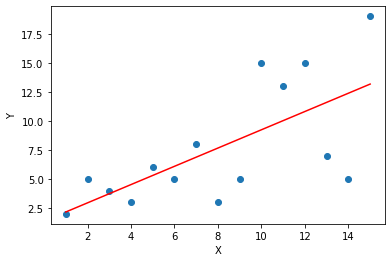

In [100]:
# График, для визуальной оценки
import matplotlib.pyplot as plt

plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y)
plt.plot(x, lr(x, k, b), color='red')

##Другое решение по нахождению коэффициентов Линейной Регрессии

In [101]:
# Зададим некое множество точек
import pandas as pd
x = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
y = pd.Series([2, 5, 4, 3, 6, 5, 8, 3, 5, 15, 13, 15, 7, 5, 19])

In [102]:
# считаем коэффициенты 
dif_x = x - x.mean()
dif_y = y - y.mean()
k = sum(dif_x * dif_y) / sum(dif_x**2)
b = y.mean() - k * x.mean()

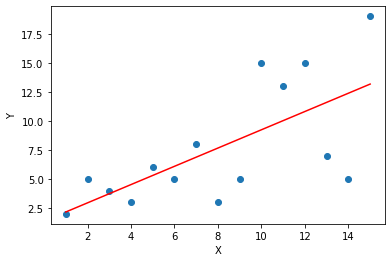

In [103]:
# рисуем график
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y)
plt.plot(x, lr(x, k, b), color='red')

In [104]:
print('k =', k, '\nb =', b, '\nMSE =', MSE(x, y, k, b))

k = 0.7857142857142857 
b = 1.3809523809523814 
MSE = 1.4024193870595765e-32


**Вот теперь красиво!**

И больше похоже на правду. :)